In [1]:
%matplotlib inline

# Deep Learning for Emotions Recognition

## FER+ dataset

## Train/Test division

In [2]:
from keras.backend import image_data_format, clear_session
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.cross_validation import train_test_split

from utils.ferloader import load_fer

from random import uniform

import matplotlib.pyplot as plt
# Set bigger figures
plt.rcParams["figure.figsize"] = (15, 15)

import os.path

# Constants
IMAGE_WIDTH = 48
IMAGE_HEIGHT = 48
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
DATA_FORMAT = image_data_format()

# Prepare data
data, target = load_fer("data/fer2013.npz")
data_train, data_test, target_train, target_test = \
  train_test_split(data, target, test_size=0.15, random_state=7, stratify=target)
_, n_features = data.shape

# Prepare targets
onehot_train = to_categorical(target_train)
onehot_test = to_categorical(target_test)

/home/piotr/.virtualenvs/beit/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/piotr/.virtualenvs/beit/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data inspection

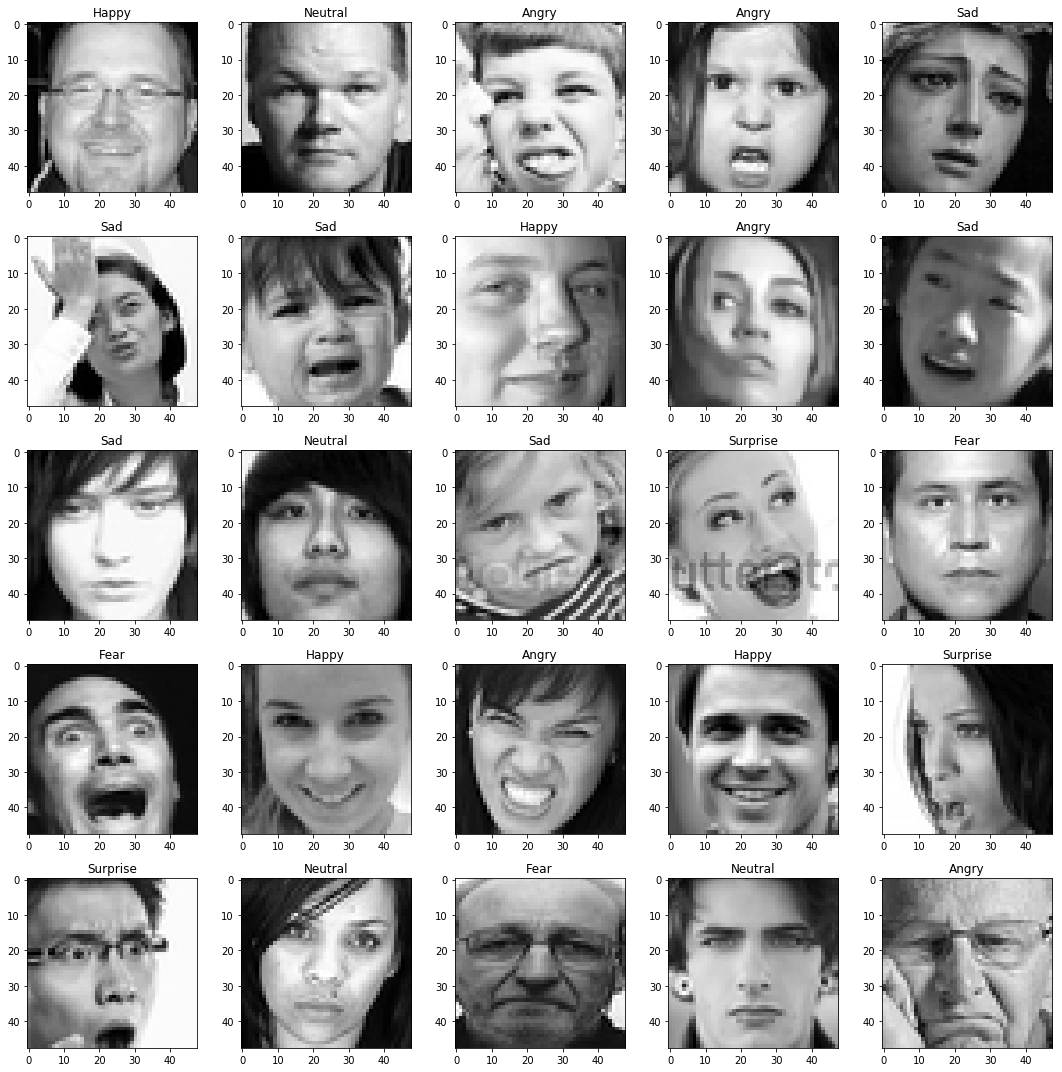

In [3]:
# Visualize data
for i, (image, label) in enumerate(zip(data_test[:25, :], target_test[:25])):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image.reshape((IMAGE_HEIGHT, IMAGE_WIDTH)), cmap=plt.cm.gray)
    plt.title(EMOTIONS[label])
# Make more space between subplots
plt.tight_layout()
plt.show()

## Build model

### Convolution

### Batch Normalization

### Dropout

In [ ]:
model = Sequential()
if DATA_FORMAT == 'channels_first':
    model.add(Reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH), input_shape=(n_features,))) # (1 x 48 x 48)
else:
    model.add(Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 1), input_shape=(n_features,)))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same'))                         # (64 x 44 x 44)
if DATA_FORMAT == 'channels_first':
    model.add(BatchNormalization(axis=1))
else:
    model.add(BatchNormalization(axis=3))
model.add(Activation(activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                         # (64 x 22 x 22)
model.add(Conv2D(64, kernel_size=(5, 5), padding='same'))                         # (64 x 18 x 18)
if DATA_FORMAT == 'channels_first':
    model.add(BatchNormalization(axis=1))
else:
    model.add(BatchNormalization(axis=3))
model.add(Activation(activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                                         # (64 x 9 x 9)
model.add(Flatten())                                                              # (1 x 5184)
model.add(Dense(1024, activation='relu'))                                         # (1 x 1024)
model.add(Dropout(0.4))
model.add(Dense(len(EMOTIONS), activation='softmax'))                             # (1 x 7)

## Hiperparameters

### Learning rate

### Momentum

### Decay

## Loss function

## Optimizer

In [4]:
momentum_opt = SGD(lr=0.008, momentum=0.43, decay=0.00023, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=momentum_opt,
    metrics=['accuracy']
)
    
return model

## Callbacks

### Model checkpoints

### Tensorboard

### Early stopping

In [ ]:
callbacks_list = [
    ModelCheckpoint(os.path.join("./checkpoints/best_model.hdf5"), monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
    TensorBoard(log_dir="./logs/current_run"),
    EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
] 

## Training

### Gradient decent

In [5]:
model.fit(data_train, onehot_train, epochs=100, batch_size=32, validation_split=0.15, callbacks=callbacks_list)

## Evaluate model

In [6]:
# Load best model
model.load_weights("./checkpoints/best_model.hdf5")

# Evaluate best model
results = model.evaluate(data_test, onehot_test, batch_size=32)
print("\n[!] Evaluation results:")
print("{0}: {2:.3f}, {1}: {3:.3f}".format(*model.metrics_names, *results))
    
# Predict subset of faces
preds = model.predict(data_test[:25, :])

# Visualize example data
for i, (image, label, pred) in enumerate(zip(data_test[:25, :], target_test[:25], preds)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image.reshape((IMAGE_HEIGHT, IMAGE_WIDTH)), cmap=plt.cm.gray)
    plt.title("{} ({})".format(EMOTIONS[pred.argmax()], EMOTIONS[label]))
# Make more space between subplots
plt.tight_layout()
plt.show()

## Run!

Instructions for updating:
Use the retry module or similar alternatives.
Train on 25927 samples, validate on 4576 samples
Epoch 1/100
25927/25927 [==============================] - 51s 2ms/step - loss: 1.7505 - acc: 0.3224 - val_loss: 1.5815 - val_acc: 0.3770

Epoch 00001: val_loss improved from inf to 1.58152, saving model to ./checkpoints/best_model.hdf5
Epoch 2/100
25927/25927 [==============================] - 78s 3ms/step - loss: 1.5424 - acc: 0.4031 - val_loss: 1.5550 - val_acc: 0.3958

Epoch 00002: val_loss improved from 1.58152 to 1.55498, saving model to ./checkpoints/best_model.hdf5
Epoch 3/100
25927/25927 [==============================] - 79s 3ms/step - loss: 1.4401 - acc: 0.4433 - val_loss: 1.4671 - val_acc: 0.4329

Epoch 00003: val_loss improved from 1.55498 to 1.46714, saving model to ./checkpoints/best_model.hdf5
Epoch 4/100
25927/25927 [==============================] - 82s 3ms/step - loss: 1.3542 - acc: 0.4812 - val_loss: 2.1876 - val_acc: 0.2474

Epoch 00004: val_los

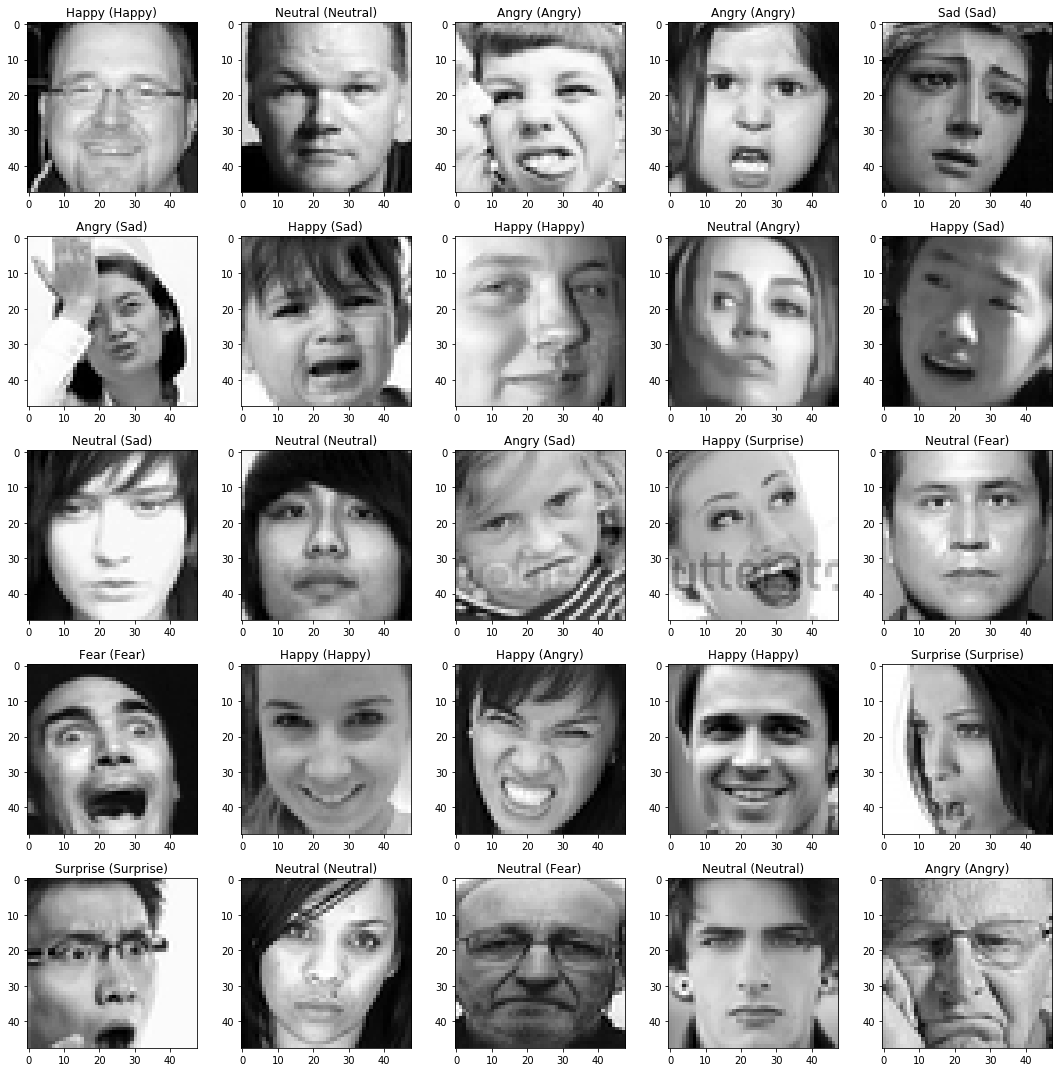

In [7]:
# Clean up
del model
clear_session()